✅ Output saved to C:/Users/dhawa/Downloads/Dhawal-20250427T154829Z-001/Dhawal/Right_Trial10.csv (only smoothed data)


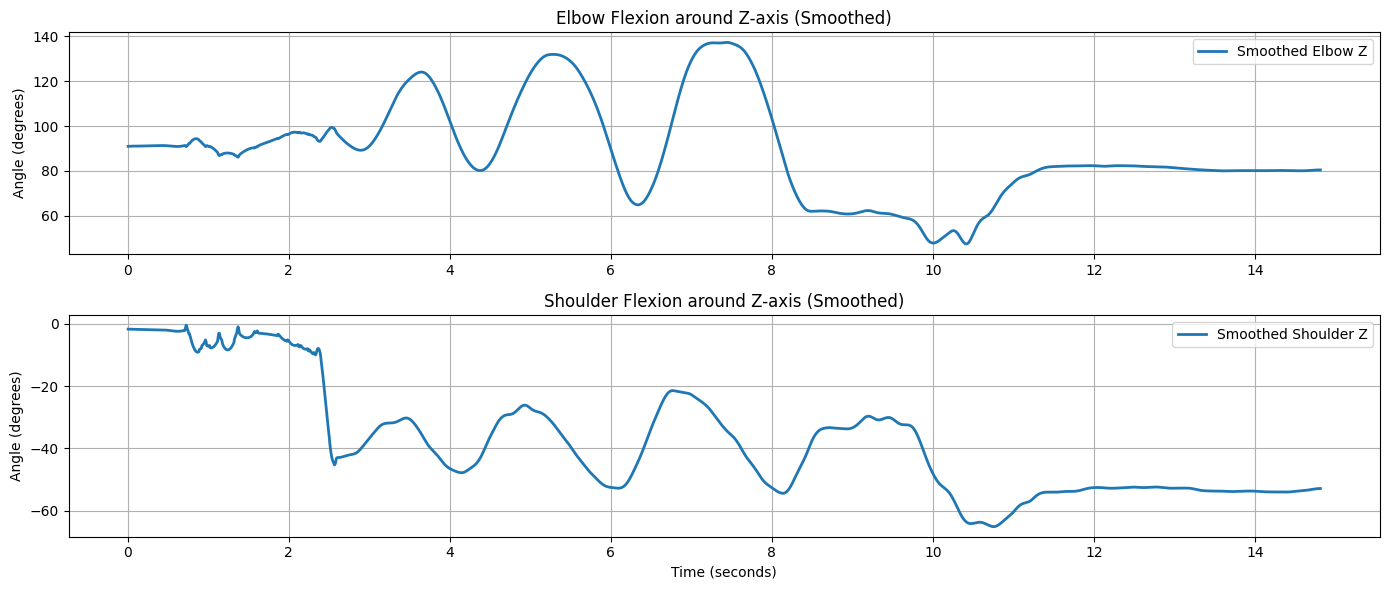

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

def compute_joint_angles_z_only_smoothed(input_csv, output_csv, plot=True):
    # Define the expected columns
    columns = [
        'Frame', 'SubFrame',
        'R_ForeArmHand_RX', 'R_ForeArmHand_RY', 'R_ForeArmHand_RZ',
        'R_UpperArmForeArm_RX', 'R_UpperArmForeArm_RY', 'R_UpperArmForeArm_RZ',
        'ThoraxUpperArm_RX', 'ThoraxUpperArm_RY', 'ThoraxUpperArm_RZ',
        'WorldThorax_RX', 'WorldThorax_RY', 'WorldThorax_RZ',
        'WorldThorax_TX', 'WorldThorax_TY', 'WorldThorax_TZ'
    ]
    
    # Step 1: Load the CSV
    df = pd.read_csv(
        input_csv,
        skiprows=5,
        names=columns,
        usecols=range(len(columns)),
        on_bad_lines='skip'
    )
    
    # Step 2: Clean non-numeric rows
    df = df[pd.to_numeric(df['Frame'], errors='coerce').notnull()]
    df['Frame'] = df['Frame'].astype(int)

    # 🛑 Step 3: Keep only the first continuous valid segment
    frame_diff = df['Frame'].diff()
    bad_breaks = (frame_diff < 0) | (frame_diff > 10)
    
    if bad_breaks.any():
        first_bad_index = bad_breaks.idxmax()
        df = df.loc[:first_bad_index - 1]  # Keep data only up to first break

    # Step 4: Extract Time and Z-axis Angles
    time = df['Frame'] / 200.0  # 200 Hz sampling
    elbow_z = df['R_UpperArmForeArm_RZ'].astype(float)
    shoulder_z = df['ThoraxUpperArm_RZ'].astype(float)

    # Step 5: Smooth the signals
    window_size = 51  # Must be odd
    poly_order = 3

    elbow_z_smoothed = savgol_filter(elbow_z, window_size, poly_order)
    shoulder_z_smoothed = savgol_filter(shoulder_z, window_size, poly_order)

    # 🛠 Step 6: Create output DataFrame with ONLY smoothed data
    output_df = pd.DataFrame({
        'Time (s)': time,
        'Elbow Flexion Angle Z (deg) (Smoothed)': elbow_z_smoothed,
        'Shoulder Angle Z (deg) (Smoothed)': shoulder_z_smoothed
    })

    # Step 7: Save to CSV
    output_df.to_csv(output_csv, index=False)
    print(f"✅ Output saved to {output_csv} (only smoothed data)")

    # Step 8: Plot if requested
    if plot:
        plt.figure(figsize=(14, 6))

        plt.subplot(2, 1, 1)
        plt.plot(time, elbow_z_smoothed, label='Smoothed Elbow Z', linewidth=2)
        plt.title('Elbow Flexion around Z-axis (Smoothed)')
        plt.ylabel('Angle (degrees)')
        plt.legend()
        plt.grid(True)

        plt.subplot(2, 1, 2)
        plt.plot(time, shoulder_z_smoothed, label='Smoothed Shoulder Z', linewidth=2)
        plt.title('Shoulder Flexion around Z-axis (Smoothed)')
        plt.xlabel('Time (seconds)')
        plt.ylabel('Angle (degrees)')
        plt.legend()
        plt.grid(True)

        plt.tight_layout()
        plt.show()

# 🛠 How to use:
compute_joint_angles_z_only_smoothed("C:/Users/dhawa/Downloads/Dhawal-20250427T154829Z-001/Dhawal/Adit04R06.csv", 'C:/Users/dhawa/Downloads/Dhawal-20250427T154829Z-001/Dhawal/Right_Trial10.csv')


✅ Output saved to C:/Users/dhawa/Downloads/Dhawal-20250427T154829Z-001/Dhawal/Left_Trial10.csv (only smoothed data)


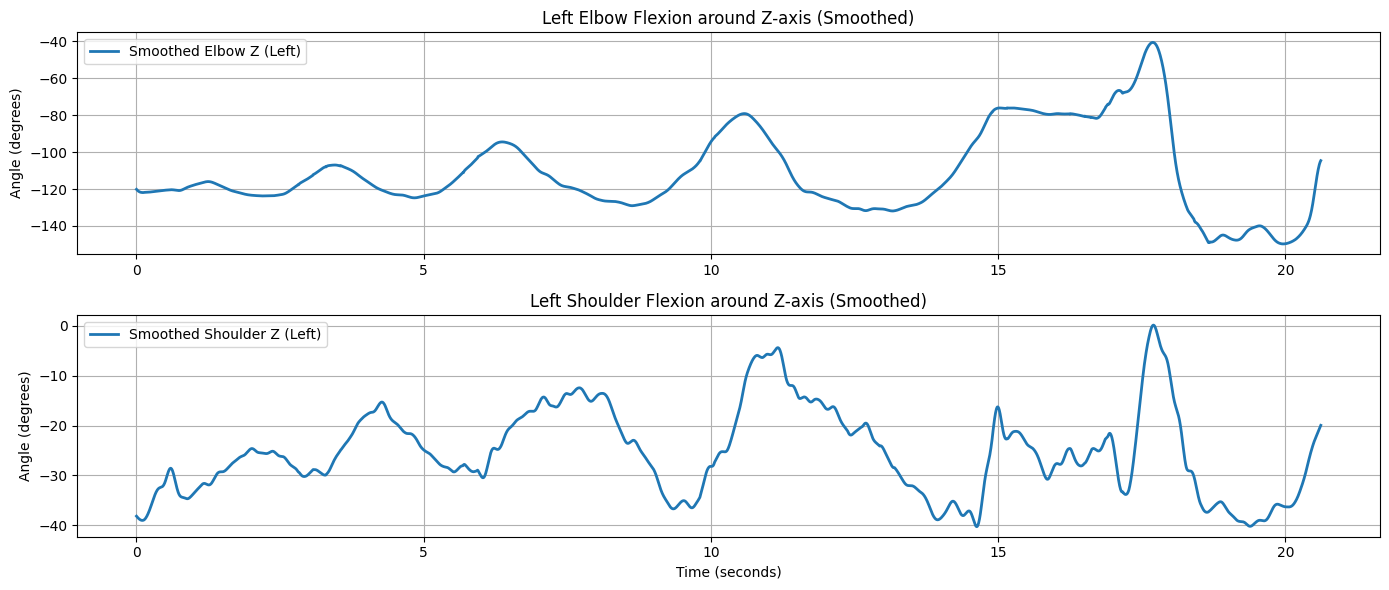

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

def compute_joint_angles_left_z_only_smoothed(input_csv, output_csv, plot=True):
    # Define all columns based on the header structure
    columns = [
        'Frame', 'SubFrame',
        # Right arm columns
        'R_ForeArmHand_RX', 'R_ForeArmHand_RY', 'R_ForeArmHand_RZ',
        'R_UpperArmForeArm_RX', 'R_UpperArmForeArm_RY', 'R_UpperArmForeArm_RZ',
        'ThoraxUpperArm_RX', 'ThoraxUpperArm_RY', 'ThoraxUpperArm_RZ',
        'WorldThorax_RX', 'WorldThorax_RY', 'WorldThorax_RZ',
        'WorldThorax_TX', 'WorldThorax_TY', 'WorldThorax_TZ',
        # Left arm columns (what we want!)
        'L_ForeArmHand_RX', 'L_ForeArmHand_RY', 'L_ForeArmHand_RZ',
        'L_UpperArmForeArm_RX', 'L_UpperArmForeArm_RY', 'L_UpperArmForeArm_RZ',
        'Thorax_LeftUpperArm_RX', 'Thorax_LeftUpperArm_RY', 'Thorax_LeftUpperArm_RZ',
        'WorldThoraxL_RX', 'WorldThoraxL_RY', 'WorldThoraxL_RZ',
        'WorldThoraxL_TX', 'WorldThoraxL_TY', 'WorldThoraxL_TZ'
    ]

    # Step 1: Load the CSV
    df = pd.read_csv(
        input_csv,
        skiprows=5,
        names=columns,
        usecols=range(len(columns)),
        on_bad_lines='skip'
    )
    
    # Step 2: Clean non-numeric rows
    df = df[pd.to_numeric(df['Frame'], errors='coerce').notnull()]
    df['Frame'] = df['Frame'].astype(int)

    # Step 3: Keep only the first continuous valid segment
    frame_diff = df['Frame'].diff()
    bad_breaks = (frame_diff < 0) | (frame_diff > 10)
    
    if bad_breaks.any():
        first_bad_index = bad_breaks.idxmax()
        df = df.loc[:first_bad_index - 1]

    # Step 4: Extract Time and Left Z-angles
    time = df['Frame'] / 200.0  # 200 Hz
    elbow_z = df['L_UpperArmForeArm_RZ'].astype(float)
    shoulder_z = df['Thorax_LeftUpperArm_RZ'].astype(float)

    # Step 5: Smooth the signals
    window_size = 51  # Must be odd
    poly_order = 3

    elbow_z_smoothed = savgol_filter(elbow_z, window_size, poly_order)
    shoulder_z_smoothed = savgol_filter(shoulder_z, window_size, poly_order)

    # Step 6: Create output DataFrame (only smoothed data)
    output_df = pd.DataFrame({
        'Time (s)': time,
        'Elbow Flexion Angle Z (deg) (Smoothed)': elbow_z_smoothed,
        'Shoulder Angle Z (deg) (Smoothed)': shoulder_z_smoothed
    })

    # Step 7: Save to CSV
    output_df.to_csv(output_csv, index=False)
    print(f"✅ Output saved to {output_csv} (only smoothed data)")

    # Step 8: Plot if requested
    if plot:
        plt.figure(figsize=(14, 6))

        plt.subplot(2, 1, 1)
        plt.plot(time, elbow_z_smoothed, label='Smoothed Elbow Z (Left)', linewidth=2)
        plt.title('Left Elbow Flexion around Z-axis (Smoothed)')
        plt.ylabel('Angle (degrees)')
        plt.legend()
        plt.grid(True)

        plt.subplot(2, 1, 2)
        plt.plot(time, shoulder_z_smoothed, label='Smoothed Shoulder Z (Left)', linewidth=2)
        plt.title('Left Shoulder Flexion around Z-axis (Smoothed)')
        plt.xlabel('Time (seconds)')
        plt.ylabel('Angle (degrees)')
        plt.legend()
        plt.grid(True)

        plt.tight_layout()
        plt.show()

# 🛠 Usage:
compute_joint_angles_left_z_only_smoothed('C:/Users/dhawa/Downloads/Dhawal-20250427T154829Z-001/Dhawal/AditL09.csv', 'C:/Users/dhawa/Downloads/Dhawal-20250427T154829Z-001/Dhawal/Left_Trial10.csv')


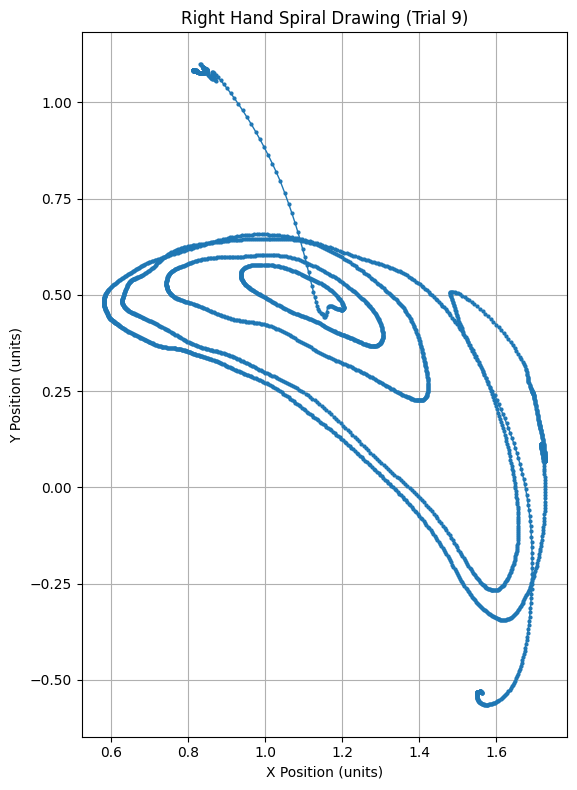

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_hand_trajectory(csv_path, L1=1.0, L2=1.0, title='Hand Trajectory (Spiral Drawing)'):
    """
    Plots hand trajectory (x vs y) for a given trial.
    """
    # Load smoothed CSV
    df = pd.read_csv(csv_path)

    # Extract angles
    shoulder_angle = df['Shoulder Angle Z (deg) (Smoothed)'].values
    elbow_angle = df['Elbow Flexion Angle Z (deg) (Smoothed)'].values

    # Convert to radians
    theta1 = np.deg2rad(shoulder_angle)
    theta2 = np.deg2rad(elbow_angle)

    # Forward Kinematics
    x = L1 * np.cos(theta1) + L2 * np.cos(theta1 + theta2)
    y = L1 * np.sin(theta1) + L2 * np.sin(theta1 + theta2)

    # Plot
    plt.figure(figsize=(8,8))
    plt.plot(x, y, '-o', markersize=2, linewidth=1)
    plt.xlabel('X Position (units)')
    plt.ylabel('Y Position (units)')
    plt.title(title)
    plt.grid(True)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.tight_layout()
    plt.show()

# 🛠 Example Usage:
# For example, plotting Trial 1 for Left Hand
plot_hand_trajectory('Final_Data/right_trials_smoothed/Right_Trial9.csv', title='Right Hand Spiral Drawing (Trial 9)')


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

def compute_manipulability_single(csv_path, output_csv_path, L1=0.26, L2=0.31):
    # Load the smoothened CSV
    df = pd.read_csv(csv_path)

    time = df['Time (s)'].values
    shoulder_angle = df['Shoulder Angle Z (deg) (Smoothed)'].values
    elbow_angle = df['Elbow Flexion Angle Z (deg) (Smoothed)'].values

    # Convert to radians
    theta1 = np.deg2rad(shoulder_angle)
    theta2 = np.deg2rad(elbow_angle)

    # Compute manipulability index
    manipulability = []
    for t1, t2 in zip(theta1, theta2):
        J = np.array([
            [-L1*np.sin(t1) - L2*np.sin(t1+t2), -L2*np.sin(t1+t2)],
            [ L1*np.cos(t1) + L2*np.cos(t1+t2),  L2*np.cos(t1+t2)]
        ])
        w = np.sqrt(np.linalg.det(J @ J.T))
        manipulability.append(w)

    manipulability = np.array(manipulability)

    # Save output
    output_df = pd.DataFrame({
        'Time (s)': time,
        'Manipulability Index': manipulability
    })
    output_df.to_csv(output_csv_path, index=False)

def batch_process_manipulability(input_folder, output_folder, side_label):
    """
    side_label: 'Left' or 'Right'
    """
    # Make sure output folder exists
    os.makedirs(output_folder, exist_ok=True)

    # List all files
    trial_files = sorted([f for f in os.listdir(input_folder) if f.endswith('.csv')])

    for i, file_name in enumerate(trial_files):
        trial_num = i + 1
        input_path = os.path.join(input_folder, file_name)
        output_path = os.path.join(output_folder, f'{side_label}_Trial{trial_num}_Manipulability.csv')

        compute_manipulability_single(input_path, output_path)

        print(f"✅ Processed {file_name} -> {output_path}")

# 🛠 Example Usage:

# For Left Hand Trials
batch_process_manipulability(
    input_folder="C:/Users/dhawa/Downloads/Final_Data/left_trials_smoothed",   # folder containing 10 left smoothed CSVs
    output_folder='C:/Users/dhawa/Downloads/Final_Data/left_trials_manipulability',
    side_label='Left_'
)

# For Right Hand Trials
batch_process_manipulability(
    input_folder='C:/Users/dhawa/Downloads/Final_Data/right_trials_smoothed',  # folder containing 10 right smoothed CSVs
    output_folder='C:/Users/dhawa/Downloads/Final_Data/right_trials_manipulability',
    side_label='Right_'
)


✅ Processed Left_Trial1.csv -> C:/Users/dhawa/Downloads/Final_Data/left_trials_manipulability\Left__Trial1_Manipulability.csv
✅ Processed Left_Trial2.csv -> C:/Users/dhawa/Downloads/Final_Data/left_trials_manipulability\Left__Trial2_Manipulability.csv
✅ Processed Left_Trial3.csv -> C:/Users/dhawa/Downloads/Final_Data/left_trials_manipulability\Left__Trial3_Manipulability.csv
✅ Processed Left_Trial4.csv -> C:/Users/dhawa/Downloads/Final_Data/left_trials_manipulability\Left__Trial4_Manipulability.csv
✅ Processed Left_Trial5.csv -> C:/Users/dhawa/Downloads/Final_Data/left_trials_manipulability\Left__Trial5_Manipulability.csv
✅ Processed Left_Trial6.csv -> C:/Users/dhawa/Downloads/Final_Data/left_trials_manipulability\Left__Trial6_Manipulability.csv
✅ Processed Left_Trial7.csv -> C:/Users/dhawa/Downloads/Final_Data/left_trials_manipulability\Left__Trial7_Manipulability.csv
✅ Processed Left_Trial8.csv -> C:/Users/dhawa/Downloads/Final_Data/left_trials_manipulability\Left__Trial8_Manipulabil

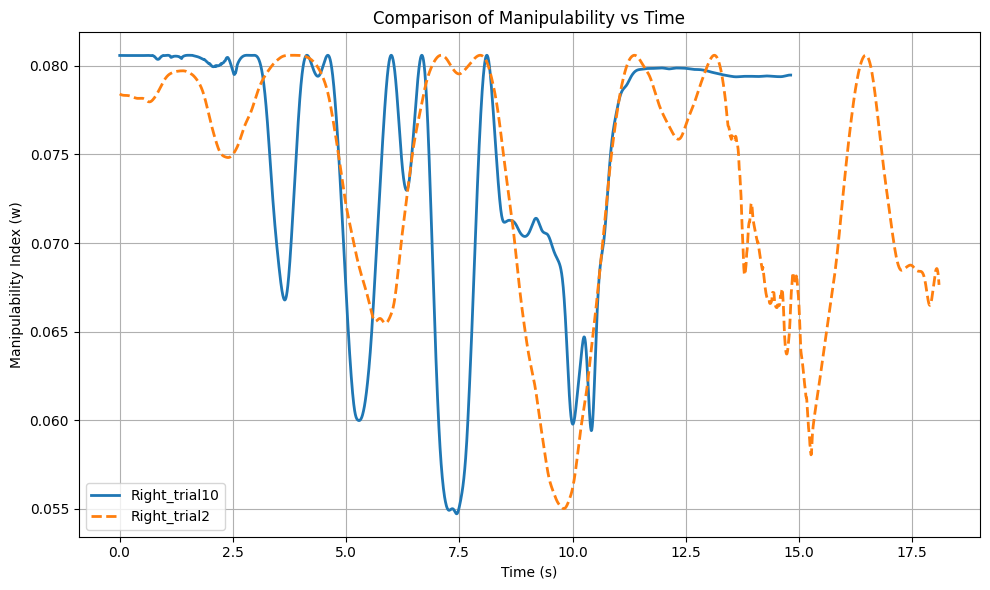

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

def compute_manipulability(time, shoulder_angle, elbow_angle, L1=0.26, L2=0.31):
    """
    Given time, shoulder and elbow angles, compute manipulability index w(t).
    """
    theta1 = np.deg2rad(shoulder_angle)
    theta2 = np.deg2rad(elbow_angle)

    manipulability = []
    for t1, t2 in zip(theta1, theta2):
        J = np.array([
            [-L1*np.sin(t1) - L2*np.sin(t1+t2), -L2*np.sin(t1+t2)],
            [ L1*np.cos(t1) + L2*np.cos(t1+t2),  L2*np.cos(t1+t2)]
        ])
        w = np.sqrt(np.linalg.det(J @ J.T))
        manipulability.append(w)

    return np.array(manipulability)

def plot_manipulability_comparison(csv_path1, csv_path2, L1=0.26, L2=0.31):
    """
    Compare manipulability evolution between two trials.
    """
    # Automatically create labels from filenames (without .csv)
    label1 = os.path.splitext(os.path.basename(csv_path1))[0]
    label2 = os.path.splitext(os.path.basename(csv_path2))[0]

    # Load first trial
    df1 = pd.read_csv(csv_path1)
    time1 = df1['Time (s)'].values
    shoulder_angle1 = df1['Shoulder Angle Z (deg) (Smoothed)'].values
    elbow_angle1 = df1['Elbow Flexion Angle Z (deg) (Smoothed)'].values
    manipulability1 = compute_manipulability(time1, shoulder_angle1, elbow_angle1, L1, L2)

    # Load second trial
    df2 = pd.read_csv(csv_path2)
    time2 = df2['Time (s)'].values
    shoulder_angle2 = df2['Shoulder Angle Z (deg) (Smoothed)'].values
    elbow_angle2 = df2['Elbow Flexion Angle Z (deg) (Smoothed)'].values
    manipulability2 = compute_manipulability(time2, shoulder_angle2, elbow_angle2, L1, L2)

    # Plot
    plt.figure(figsize=(10,6))
    plt.plot(time1, manipulability1, label=label1, linewidth=2)
    plt.plot(time2, manipulability2, label=label2, linewidth=2, linestyle='--')
    plt.xlabel('Time (s)')
    plt.ylabel('Manipulability Index (w)')
    plt.title('Comparison of Manipulability vs Time')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# 🛠 Example Usage:
# Assuming your files are named like 'Right_trial1.csv', 'Left_trial1.csv' etc.
plot_manipulability_comparison('C:/Users/dhawa/Downloads/Final_Data/right_trials_smoothed/Right_trial10.csv', 'C:/Users/dhawa/Downloads/Final_Data/right_trials_smoothed/Right_trial2.csv')


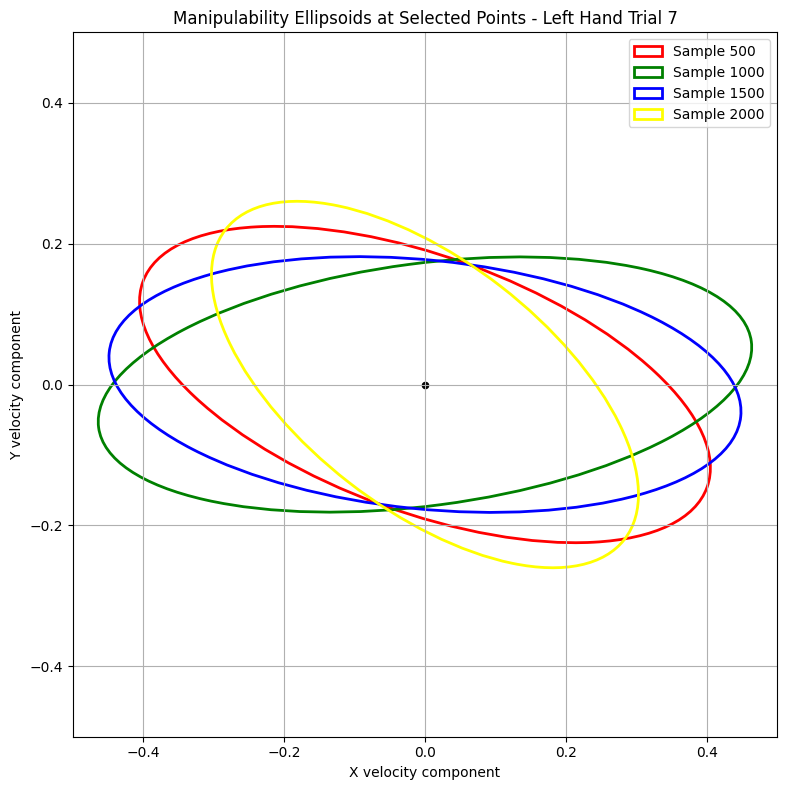

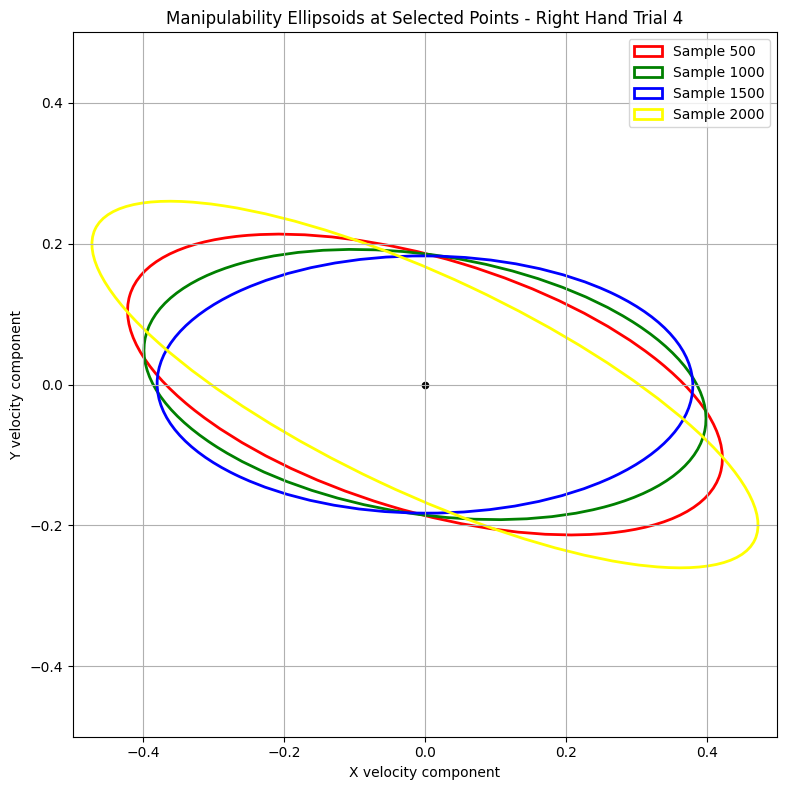

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

def compute_jacobian(theta1, theta2, L1=0.26, L2=0.31):
    J = np.array([
        [-L1*np.sin(theta1) - L2*np.sin(theta1 + theta2), -L2*np.sin(theta1 + theta2)],
        [ L1*np.cos(theta1) + L2*np.cos(theta1 + theta2),  L2*np.cos(theta1 + theta2)]
    ])
    return J

def plot_velocity_ellipsoid(J, center=(0,0), color='blue', label=None, ax=None):
    JJ_T = J @ J.T
    eigvals, eigvecs = np.linalg.eigh(JJ_T)

    # Sort eigenvalues and eigenvectors
    order = eigvals.argsort()[::-1]
    eigvals = eigvals[order]
    eigvecs = eigvecs[:, order]

    width = 2 * np.sqrt(eigvals[0])
    height = 2 * np.sqrt(eigvals[1])
    angle = np.degrees(np.arctan2(eigvecs[1,0], eigvecs[0,0]))

    ellipse = Ellipse(xy=center, width=width, height=height, angle=angle,
                      edgecolor=color, facecolor='none', lw=2, label=label)
    
    if ax is not None:
        ax.add_patch(ellipse)
    else:
        fig, ax = plt.subplots(figsize=(6,6))
        ax.add_patch(ellipse)
        ax.set_xlim(center[0]-1, center[0]+1)
        ax.set_ylim(center[1]-1, center[1]+1)
        ax.set_aspect('equal')
        plt.grid(True)
        plt.show()
    
    return ellipse  # Return the artist for legend

def plot_ellipsoids_from_trial(csv_path, trial_label='Trial', sample_indices=[500, 1000, 1500, 2000]):
    df = pd.read_csv(csv_path)
    shoulder_angle = np.deg2rad(df['Shoulder Angle Z (deg) (Smoothed)'].values)
    elbow_angle = np.deg2rad(df['Elbow Flexion Angle Z (deg) (Smoothed)'].values)

    fig, ax = plt.subplots(figsize=(8,8))

    colors = ['red', 'green', 'blue', 'yellow']
    ellipses = []

    for idx, color in zip(sample_indices, colors):
        if idx >= len(shoulder_angle):
            continue
        t1 = shoulder_angle[idx]
        t2 = elbow_angle[idx]
        J = compute_jacobian(t1, t2)
        ellipse = plot_velocity_ellipsoid(J, center=(0,0), color=color, label=f'Sample {idx}', ax=ax)
        ellipses.append(ellipse)

    ax.scatter(0,0, color='black', s=20)  # center point
    ax.set_title(f'Manipulability Ellipsoids at Selected Points - {trial_label}')
    ax.set_xlim(-0.5, 0.5)
    ax.set_ylim(-0.5, 0.5)
    ax.set_xlabel('X velocity component')
    ax.set_ylabel('Y velocity component')
    ax.set_aspect('equal')
    ax.grid(True)
    ax.legend(handles=ellipses, loc='upper right')
    plt.tight_layout()
    plt.show()


# Example usage:
# For Left Hand Trial 1
plot_ellipsoids_from_trial('C:/Users/dhawa/Downloads/Final_Data/left_trials_smoothed/Left_trial7.csv', trial_label='Left Hand Trial 7', sample_indices=[500, 1000, 1500, 2000])

# For Right Hand Trial 1
plot_ellipsoids_from_trial('C:/Users/dhawa/Downloads/Final_Data/right_trials_smoothed/Right_trial4.csv', trial_label='Right Hand Trial 4', sample_indices=[500, 1000, 1500, 2000])


In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from matplotlib.patches import Ellipse

# Constants
L1 = 0.26  # Upper arm length
L2 = 0.31  # Forearm length

def compute_jacobian(theta1, theta2, L1=0.26, L2=0.31):
    """
    Compute 2R Jacobian at given joint angles.
    """
    J = np.array([
        [-L1*np.sin(theta1) - L2*np.sin(theta1 + theta2), -L2*np.sin(theta1 + theta2)],
        [ L1*np.cos(theta1) + L2*np.cos(theta1 + theta2),  L2*np.cos(theta1 + theta2)]
    ])
    return J

def plot_velocity_ellipsoid(ax, J, center, color='green'):
    """
    Plot the velocity manipulability ellipsoid at center position.
    """
    JJ_T = J @ J.T
    eigvals, eigvecs = np.linalg.eigh(JJ_T)
    order = eigvals.argsort()[::-1]
    eigvals = eigvals[order]
    eigvecs = eigvecs[:, order]

    width = 2 * np.sqrt(eigvals[0])
    height = 2 * np.sqrt(eigvals[1])
    angle = np.degrees(np.arctan2(eigvecs[1, 0], eigvecs[0, 0]))

    ellipse = Ellipse(xy=center, width=width, height=height, angle=angle,
                      edgecolor=color, facecolor='none', lw=2)
    ax.add_patch(ellipse)

def animate_2r_with_ellipsoid(csv_path, output_gif='manipulability_animation.gif', sample_rate=10):
    """
    Create an animation of 2R arm and velocity manipulability ellipsoid.
    """
    # Load Data
    df = pd.read_csv(csv_path)
    shoulder_angle = np.deg2rad(df['Shoulder Angle Z (deg) (Smoothed)'].values)
    elbow_angle = np.deg2rad(df['Elbow Flexion Angle Z (deg) (Smoothed)'].values)

    # Sample to reduce frames
    shoulder_angle = shoulder_angle[::sample_rate]
    elbow_angle = elbow_angle[::sample_rate]

    # Handle safe frames
    total_frames = min(len(shoulder_angle), len(elbow_angle))

    fig, ax = plt.subplots(figsize=(7,7))
    ax.set_xlim(-0.7, 0.7)
    ax.set_ylim(-0.7, 0.7)
    ax.set_aspect('equal')
    ax.set_xlabel('X Position')
    ax.set_ylabel('Y Position')
    ax.grid(True)

    def init():
        return []

    def update(frame):
        if frame >= total_frames:
            return []

        # Clear full plot properly
        ax.cla()
        ax.set_xlim(-0.7, 0.7)
        ax.set_ylim(-0.7, 0.7)
        ax.set_aspect('equal')
        ax.set_xlabel('X Position')
        ax.set_ylabel('Y Position')
        ax.grid(True)

        t1 = shoulder_angle[frame]
        t2 = elbow_angle[frame]

        # Joint Positions
        x0, y0 = 0, 0
        x1 = L1 * np.cos(t1)
        y1 = L1 * np.sin(t1)
        x2 = x1 + L2 * np.cos(t1 + t2)
        y2 = y1 + L2 * np.sin(t1 + t2)

        # Plot links
        ax.plot([x0, x1], [y0, y1], 'o-', lw=4, color='red')
        ax.plot([x1, x2], [y1, y2], 'o-', lw=4, color='blue')

        # Plot ellipsoid
        J = compute_jacobian(t1, t2, L1, L2)
        plot_velocity_ellipsoid(ax, J, center=(x2, y2), color='green')

        return []

    ani = FuncAnimation(fig, update, frames=total_frames,
                        init_func=init, blit=False, interval=50)

    ani.save(output_gif, writer=PillowWriter(fps=15))
    plt.close()

    print(f"Animation saved successfully at {output_gif}!")


# 🛠 Example Usage:
animate_2r_with_ellipsoid('C:/Users/dhawa/Downloads/Final_Data/right_trials_smoothed/Right_trial4.csv', output_gif='C:/Users/dhawa/Downloads/Final_Data/RightHand_Animation.gif', sample_rate=30)
# animate_2r_with_ellipsoid('Left_trial7.csv', output_gif='LeftHand_Animation.gif', sample_rate=10)


Animation saved successfully at C:/Users/dhawa/Downloads/Final_Data/RightHand_Animation.gif!


✅ Processed 10 Left trials
✅ Processed 10 Right trials


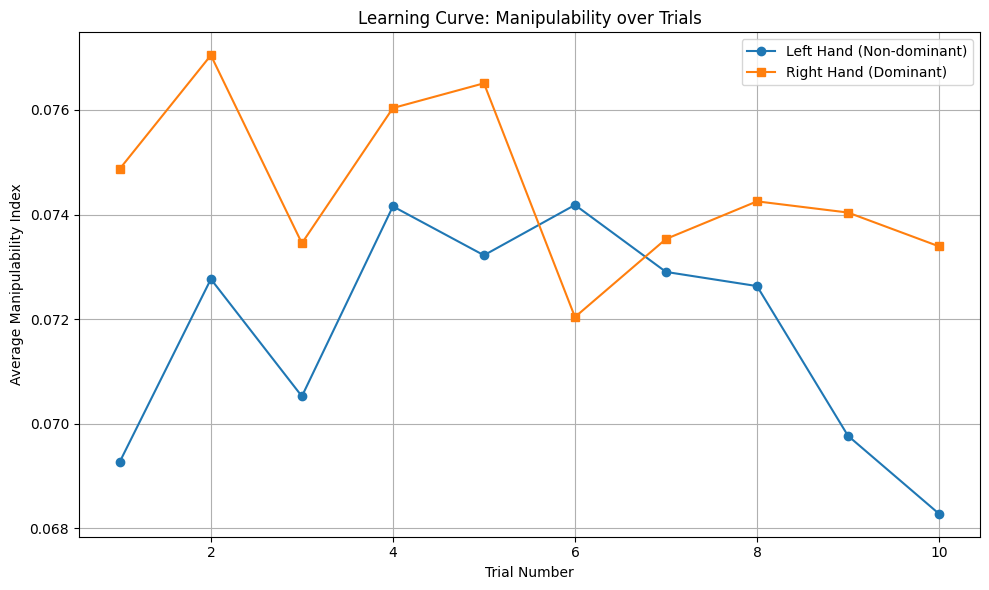

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

def compute_trial_means(manipulability_folder, side_label):
    """
    Compute average manipulability per trial.
    Returns list of means.
    """
    trial_files = sorted([f for f in os.listdir(manipulability_folder) if f.endswith('.csv')])
    trial_means = []

    for file_name in trial_files:
        file_path = os.path.join(manipulability_folder, file_name)
        df = pd.read_csv(file_path)

        mean_w = df['Manipulability Index'].mean()
        trial_means.append(mean_w)

    print(f"✅ Processed {len(trial_means)} {side_label} trials")
    return trial_means

def plot_learning_curve(left_means, right_means):
    trials = np.arange(1, len(left_means) + 1)

    plt.figure(figsize=(10, 6))
    plt.plot(trials, left_means, 'o-', label='Left Hand (Non-dominant)')
    plt.plot(trials, right_means, 's-', label='Right Hand (Dominant)')
    plt.xlabel('Trial Number')
    plt.ylabel('Average Manipulability Index')
    plt.title('Learning Curve: Manipulability over Trials')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# 🛠 Example usage:

# Step 1: Compute per-trial averages
left_means = compute_trial_means('C:/Users/dhawa/Downloads/Final_Data/left_trials_manipulability', side_label='Left')
right_means = compute_trial_means('C:/Users/dhawa/Downloads/Final_Data/right_trials_manipulability', side_label='Right')

# Step 2: Plot learning curves
plot_learning_curve(left_means, right_means)


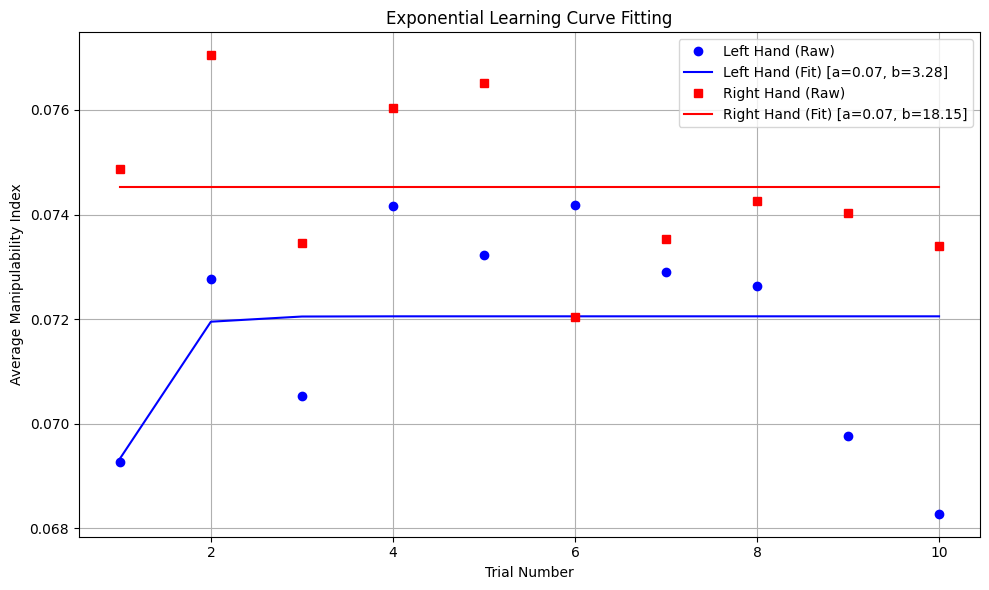

✅ Left Hand Fit: a = 0.072, b = 3.275
✅ Right Hand Fit: a = 0.075, b = 18.152


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def learning_curve_function(t, a, b):
    """
    Exponential learning curve model: y(t) = a(1 - exp(-b*t))
    """
    return a * (1 - np.exp(-b * t))

def fit_learning_curve(trial_numbers, trial_means):
    """
    Fits exponential learning curve and returns fitted params and predicted values
    """
    # Initial guess: a = final value, b = small positive number
    p0 = [max(trial_means), 0.1]

    popt, pcov = curve_fit(learning_curve_function, trial_numbers, trial_means, p0=p0, bounds=(0, np.inf))
    a_fit, b_fit = popt

    fitted_values = learning_curve_function(trial_numbers, a_fit, b_fit)

    return a_fit, b_fit, fitted_values

def plot_learning_curve_with_fit(left_means, right_means):
    trials = np.arange(1, len(left_means) + 1)

    # Fit both sides
    a_left, b_left, left_fit = fit_learning_curve(trials, left_means)
    a_right, b_right, right_fit = fit_learning_curve(trials, right_means)

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(trials, left_means, 'o', label='Left Hand (Raw)', color='blue')
    plt.plot(trials, left_fit, '-', label=f'Left Hand (Fit) [a={a_left:.2f}, b={b_left:.2f}]', color='blue')

    plt.plot(trials, right_means, 's', label='Right Hand (Raw)', color='red')
    plt.plot(trials, right_fit, '-', label=f'Right Hand (Fit) [a={a_right:.2f}, b={b_right:.2f}]', color='red')

    plt.xlabel('Trial Number')
    plt.ylabel('Average Manipulability Index')
    plt.title('Exponential Learning Curve Fitting')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    print(f"✅ Left Hand Fit: a = {a_left:.3f}, b = {b_left:.3f}")
    print(f"✅ Right Hand Fit: a = {a_right:.3f}, b = {b_right:.3f}")

# 🛠 Example Usage:

# Suppose you already have:
# left_means = compute_trial_means('left_trials_manipulability', side_label='Left')
# right_means = compute_trial_means('right_trials_manipulability', side_label='Right')

# Now fit and plot:
plot_learning_curve_with_fit(left_means, right_means)
